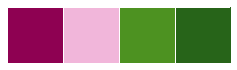

In [1]:
from donut import *
import random
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages 
%matplotlib inline

random.seed()
randSeed = int(random.random()*100000)

import pandas as pd
import seaborn as sns
cp = ["#8e0152","#f1b6da","#4d9221","#276419"]

#sns.palplot(sns.color_palette(cp, 4))
sns.set(style='ticks',palette=cp)
colorm="#8e0152"
colorp="#f1b6da"
colorlg="#4d9221"
colorg="#276419"

In [2]:
def GetDerivativeVectors(iv,k):
    ivP = iv.PointList()
    DivP, DDivP = [],[]
    for i in range(1,len(ivP)):
        if i == 1:
            DivP.append((0,0))
            
        DivP.append((ivP[i][0]-ivP[i-1][0], ivP[i][1]-ivP[i-1][1]))
        DDivP.append((DivP[i][0]-DivP[i-1][0], DivP[i][1] - DivP[i-1][1]))
        
    DDivP.append((0,0))
    return (iv,DivP,DDivP)

def frequencymap(word, k):
    l = []
    for letter in k.OrderedKeyList():
        if letter in word:
            l.append(1.0)
        else:
            l.append(0.01)
    return l

In [13]:
w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_20000_combined_check.dat")
w.SetSeed(randSeed)

k = bearclaw.MakeStandardKeyboard()
k.SetSeed(randSeed)
k.RemoveKey('.')
kStan = k

ivL = 100
model = cruller.SimpleInterpolationModel()
model.SetXScale(.75)
model.SetYScale(0.5)
model.SetCorrelation(0)
model.SetVectorLength(ivL)
model.Interpolation = cruller.ModCubicSplineInterpolation

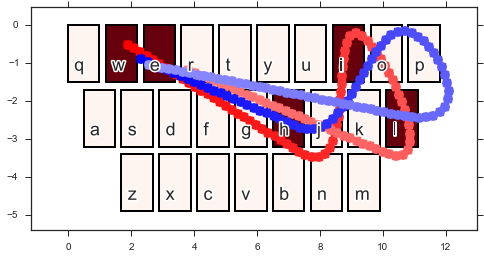

11.746345066138469
10.874271271854395


In [39]:
word1 = "while"
word2 = "whole"
iv1 = model.RandomVector(word1,kStan)
iv2 = model.RandomVector(word2,kStan)
bearclaw.DrawKeyboard(kStan,inputvector=[iv1,iv2],frequencymap=word1,colormap=mpl.cm.Reds,figsize=(8,4),nopalette=True)
#bearclaw.DrawKeyboard(kStan,inputvector=[iv1,iv2],frequencymap=word1,colormap=mpl.cm.Reds,saveas="/Users/Rylan/Desktop/dvorakSwipe.pdf",figsize=(8,4),nopalette=True)
print(model.Distance(iv1,word2,kStan))
print(model.Distance(iv2,word2,kStan))

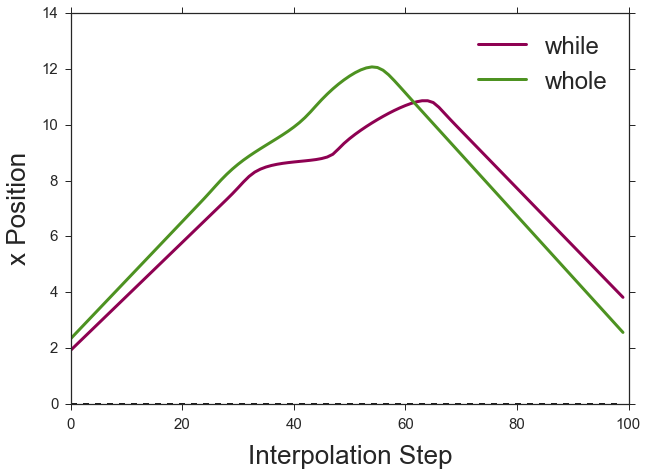

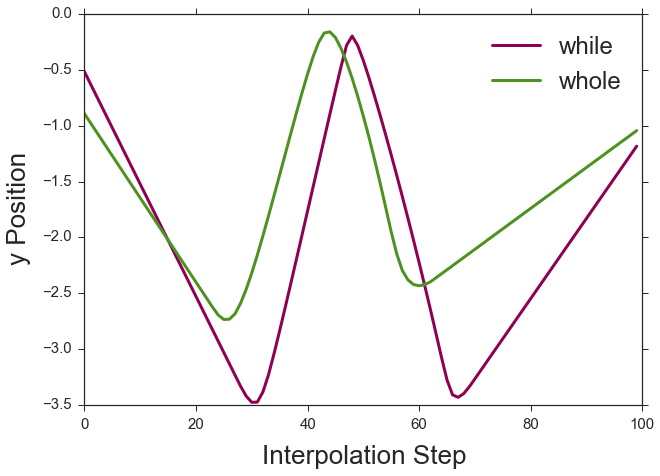

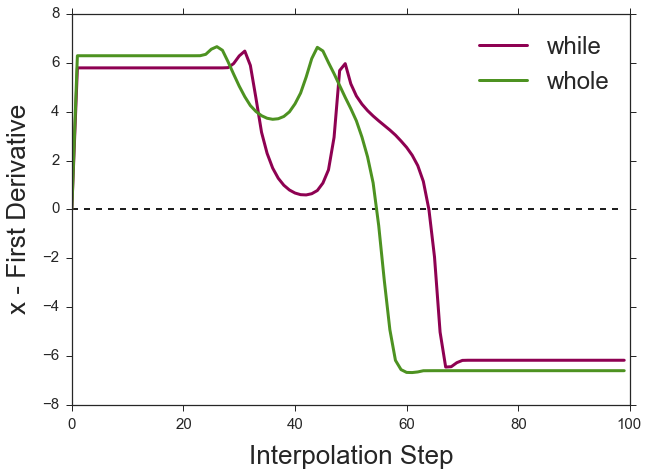

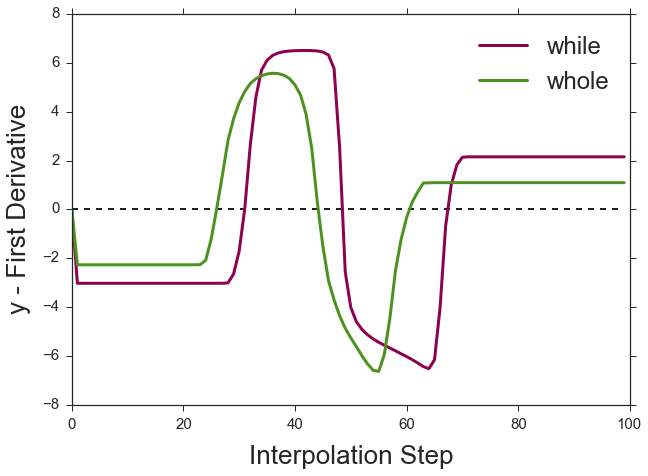

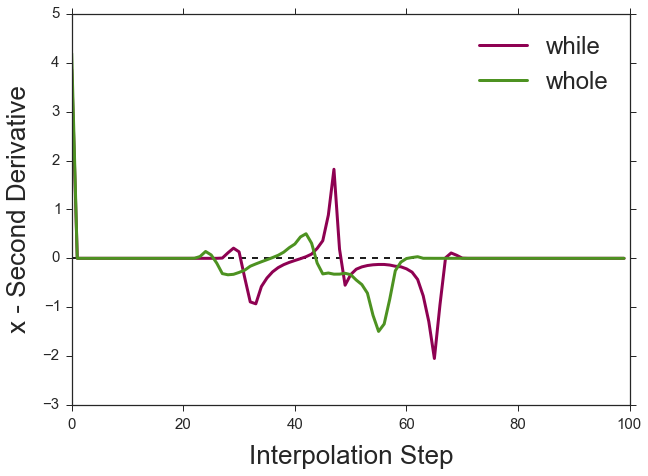

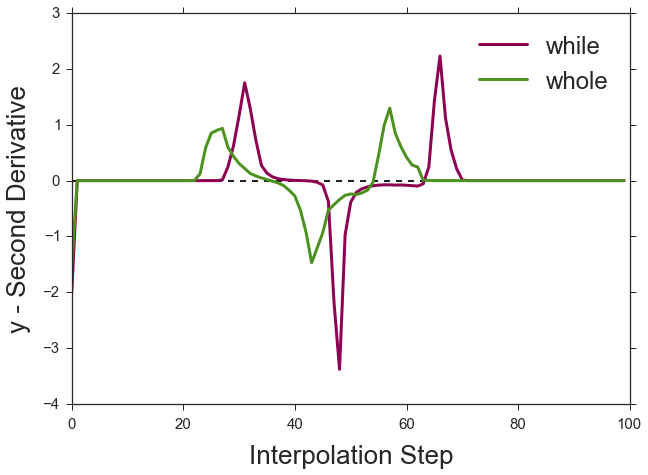

In [41]:
ivD1 = GetDerivativeVectors(iv1, kStan)
ivD2 = GetDerivativeVectors(iv2, kStan)

x1,y1,x2,y2,x3,y3 = [],[],[],[],[],[]
x12,y12,x22,y22,x32,y32 = [],[],[],[],[],[]

dep,zero = [],[]
for i in range(len(ivD1[0].PointList())):
    dep.append(i)
    zero.append(0)
    x1.append(ivD1[0].PointList()[i][0])
    y1.append(ivD1[0].PointList()[i][1])
    x12.append(ivD2[0].PointList()[i][0])
    y12.append(ivD2[0].PointList()[i][1])
for i in range(len(ivD1[1])):
    x2.append(ivD1[1][i][0]*30)
    y2.append(ivD1[1][i][1]*30)
    x22.append(ivD2[1][i][0]*30)
    y22.append(ivD2[1][i][1]*30)
for i in range(len(ivD1[2])):
    x3.append(ivD1[2][i][0]*20)
    y3.append(ivD1[2][i][1]*20)
    x32.append(ivD2[2][i][0]*20)
    y32.append(ivD2[2][i][1]*20)
    
lw=3
lfs=26
legfs=24
tfs=15
xp=13
yp=12

wholec = colorlg
whilec = colorm

savepic=True

fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineX1 = plt.plot(dep,x1,linewidth=lw,color=whilec,label=word1)
lineX12 = plt.plot(dep,x12,linewidth=lw,color=wholec,label=word2)
plt.legend(prop={'size':legfs})
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.ylabel("x Position",fontsize=lfs)
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_x1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_x1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineY1 = plt.plot(dep,y1,linewidth=lw,color=whilec,label=word1)
lineY12 = plt.plot(dep,y12,linewidth=lw,color=wholec,label=word2)
plt.ylabel("y Position",fontsize=lfs)
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.legend(prop={'size':legfs})
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_y1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_y1.pdf")
plt.show()
    
fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineX2 = plt.plot(dep,x2,linewidth=lw,color=whilec,label=word1)
lineX22 = plt.plot(dep,x22,linewidth=lw,color=wholec,label=word2)
plt.legend(prop={'size':legfs})
plt.ylabel("x - First Derivative",fontsize=lfs)
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_dx1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_dx1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineY2 = plt.plot(dep,y2,linewidth=lw,color=whilec,label=word1)
lineY22 = plt.plot(dep,y22,linewidth=lw,color=wholec,label=word2)
plt.ylabel("y - First Derivative",fontsize=lfs)
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.legend(prop={'size':legfs})
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_dy1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_dy1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineX3 = plt.plot(dep,x3,linewidth=lw,color=whilec,label=word1)
lineX32 = plt.plot(dep,x32,linewidth=lw,color=wholec,label=word2)
plt.legend(prop={'size':legfs})
plt.ylabel("x - Second Derivative",fontsize=lfs)
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_d2x1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_d2x1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
lineZero = plt.plot(dep,zero,linestyle='--',color='black')
lineY3 = plt.plot(dep,y3,linewidth=lw,color=whilec,label=word1)
lineY32 = plt.plot(dep,y32,linewidth=lw,color=wholec,label=word2)
plt.legend(prop={'size':legfs})
plt.ylabel("y - Second Derivative",fontsize=lfs)
plt.xlabel("Interpolation Step",fontsize=lfs)
plt.tick_params(axis='both', labelsize=tfs)
ax.xaxis.labelpad = xp
ax.yaxis.labelpad = yp
if savepic:
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_d2y1.svg")
    plt.savefig("/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/wholeWhile_d2y1.pdf")
plt.show()

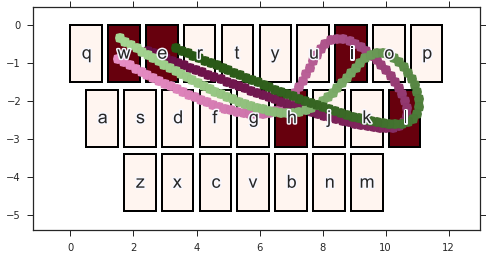

In [37]:
#filenameSwype="/Users/Rylan/cisc/swypeAwesome/DonutDocs/plots/wholeWhile_simillarSwype.pdf"
bearclaw.DrawKeyboard(kStan,inputvector=[iv1,iv2],frequencymap=word1,colormap=mpl.cm.Reds,nopalette=True,figsize=(8,4),saveas="scratch.pdf")
#bearclaw.DrawKeyboard(kStan,inputvector=iv2,frequencymap=word2,colormap=mpl.cm.Reds,nopalette=True,figsize=(8,4))